In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype("float32")/255
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype("float32")/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu",input_shape=(28,28,1)))

model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [3]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3030 - accuracy: 0.9028
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0468 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0324 - accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0199 - accuracy: 0.9939


In [4]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9914


In [5]:
test_acc

0.9914000034332275

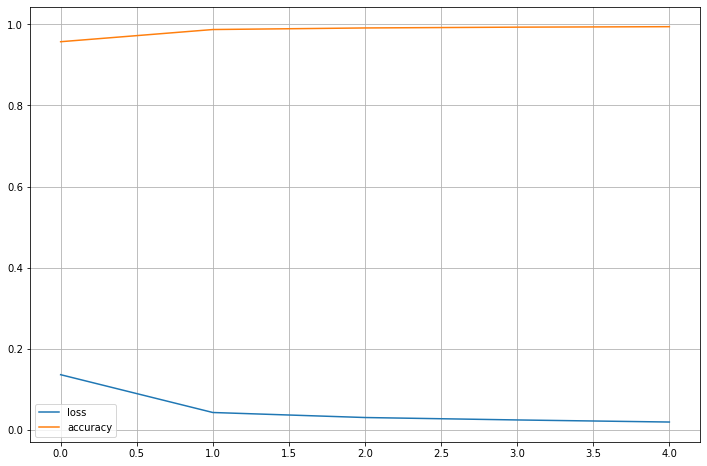

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [7]:
model.save('c:/data/mnist')

INFO:tensorflow:Assets written to: c:/data/mnist\assets
